# 1. 특성이 보이는 두 feature 탐색 (try)
corr 탐색을 통해 관련도 높은 두 특성을 골라 EDA

## 시작

In [1]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
plt.rcParams['figure.figsize'] = (18.0, 10.0)

## 관계가 많은 특징을 찾아보자

In [4]:
df_corr_set = pd.read_csv('./datas/corr_final_trans.csv')
df_corr_set.head()

,corr set,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,...,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학,제조업,Total
0,"['년도', '시장규모']",1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,17
1,"['년도', '매출액 (백만원)']",1,0,1,1,1,1,0,1,1,...,0,1,1,1,1,0,1,0,1,16
2,"['매출액 (백만원)', '시장규모']",1,0,1,1,1,1,0,1,1,...,0,1,1,1,1,1,0,0,1,16
3,"['년도', '회사수 (개)']",0,0,1,0,0,0,1,1,1,...,1,1,0,0,1,1,0,1,1,11
4,"['년도', '시총']",0,0,0,1,1,1,1,0,0,...,0,1,0,1,0,0,0,1,1,10


In [5]:
df_corr_set = df_corr_set.drop(columns=['제조업'])

In [6]:
df_corr_set[['corr set','Total']].head(10)

,corr set,Total
0,"['년도', '시장규모']",17
1,"['년도', '매출액 (백만원)']",16
2,"['매출액 (백만원)', '시장규모']",16
3,"['년도', '회사수 (개)']",11
4,"['년도', '시총']",10
5,"['매출액 (백만원)', '시총']",9
6,"['시장규모', '시총']",8
7,"['회사수 (개)', '매출액 (백만원)']",8
8,"['매출액 (백만원)', '영업이익 (백만원)']",8
9,"['회사수 (개)', '시장규모']",8


## '년도', '시장규모'
일반적으로 년도가 지날수록 시장규모가 커질거라 생각했다. 

In [7]:
df = pd.read_csv('./datas/industry_merged.csv')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.67,4.96,36.71,6.78,13.24,7.92,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.41,5.85,46.30,7.95,14.79,8.86,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.07,4.87,38.70,6.54,11.28,6.45,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.48,4.12,37.41,6.09,9.69,5.47,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.77,2.27,24.91,3.40,5.77,3.15,188031835,31828104


In [8]:
df_norm = pd.read_csv('./datas/norm_std.csv', encoding='utf-8')
df_norm.shape

(280, 15)

In [9]:
df_mkcap = df.pivot_table('회사수 (개)', '년도','산업분류')
df_mkcap

산업분류,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,...,음식료품,의료·정밀기기,의약품,전기가스,전기전자,제조업,종이·목재,철강금속,통신업,화학
년도,,,,,,,,,,,,,,,,,,,,,
2005,54,1,95,31,5,29,214,62,71,22,...,54,24,61,10,318,995,36,92,21,122
2006,57,1,102,32,5,32,249,59,73,25,...,55,25,64,10,342,1042,36,96,21,126
2007,57,1,103,32,5,32,295,56,76,22,...,57,26,66,10,350,1049,32,95,22,124
2008,56,1,100,24,5,30,303,51,79,24,...,52,27,69,11,361,1052,33,98,22,128
2009,55,2,94,23,5,30,303,45,78,26,...,52,25,72,12,350,1029,33,95,22,132
2010,55,2,100,22,5,30,293,46,82,25,...,53,25,78,11,348,1046,33,105,20,124
2011,57,3,103,24,6,30,274,43,89,22,...,52,26,77,13,343,1052,33,106,23,126
2012,59,2,114,28,5,31,275,41,92,25,...,52,27,84,12,340,1083,33,107,22,134
2013,57,1,114,28,6,29,314,39,93,26,...,53,28,86,12,342,1085,32,107,22,134


In [10]:
df_mkcap_norm = df_norm.pivot_table('회사수 (개)', '년도','산업분류')
df_mkcap_norm

산업분류,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,유통업,음식료품,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학
년도,,,,,,,,,,,,,,,,,,,,
2005,-0.54,-0.87,-1.49,0.46,-0.72,-1.10,-1.95,1.91,-1.37,-1.71,-1.85,-0.25,-0.85,-1.40,-0.97,-2.24,1.76,-1.85,-0.76,-1.26
2006,0.88,-0.87,-0.57,0.67,-0.72,0.44,-1.21,1.58,-1.22,0.28,-1.51,0.10,-0.72,-1.20,-0.97,-0.56,1.76,-1.09,-0.76,-0.81
2007,0.88,-0.87,-0.43,0.67,-0.72,0.44,-0.24,1.25,-0.99,-1.71,-0.49,0.80,-0.59,-1.07,-0.97,0.01,-0.21,-1.28,0.57,-1.03
2008,0.41,-0.87,-0.83,-1.04,-0.72,-0.58,-0.07,0.71,-0.77,-0.38,0.76,-0.96,-0.47,-0.87,-0.22,0.78,0.28,-0.72,0.57,-0.59
2009,-0.07,0.35,-1.62,-1.25,-0.72,-0.58,-0.07,0.06,-0.84,0.95,-0.37,-0.96,-0.72,-0.67,0.54,0.01,0.28,-1.28,0.57,-0.14
2010,-0.07,0.35,-0.83,-1.47,-0.72,-0.58,-0.28,0.17,-0.54,0.28,-0.37,-0.60,-0.72,-0.28,-0.22,-0.14,0.28,0.61,-2.08,-1.03
2011,0.88,1.56,-0.43,-1.04,1.29,-0.58,-0.68,-0.15,-0.02,-1.71,-1.17,-0.96,-0.59,-0.34,1.29,-0.49,0.28,0.80,1.89,-0.81
2012,1.83,0.35,1.02,-0.18,-0.72,-0.07,-0.66,-0.37,0.21,0.28,0.08,-0.96,-0.47,0.12,0.54,-0.70,0.28,0.98,0.57,0.09
2013,0.88,-0.87,1.02,-0.18,1.29,-1.10,0.16,-0.59,0.28,0.95,0.65,-0.60,-0.34,0.25,0.54,-0.56,-0.21,0.98,0.57,0.09


In [11]:
sector_ls = list(df_mkcap.columns[df_mkcap.iloc[0] == 1])
# sector_ls.remove('corr set')
# sector_ls.remove('Total')
sector_ls

['광업']

In [12]:
sector_ls = list(df_mkcap.loc[2018,].sort_values(ascending=False)[2:].index)
sector_ls

['서비스업',
 '화학',
 '유통업',
 '기계',
 '운수장비',
 '의약품',
 '철강금속',
 '음식료품',
 '건설업',
 '의료·정밀기기',
 '기타제조업',
 '섬유의복',
 '비금속광물',
 '종이·목재',
 '운수창고업',
 '통신업',
 '전기가스',
 '농업, 임업 및 어업',
 '광업']

### 정규화 하지 않은 그래프

<AxesSubplot:xlabel='년도'>

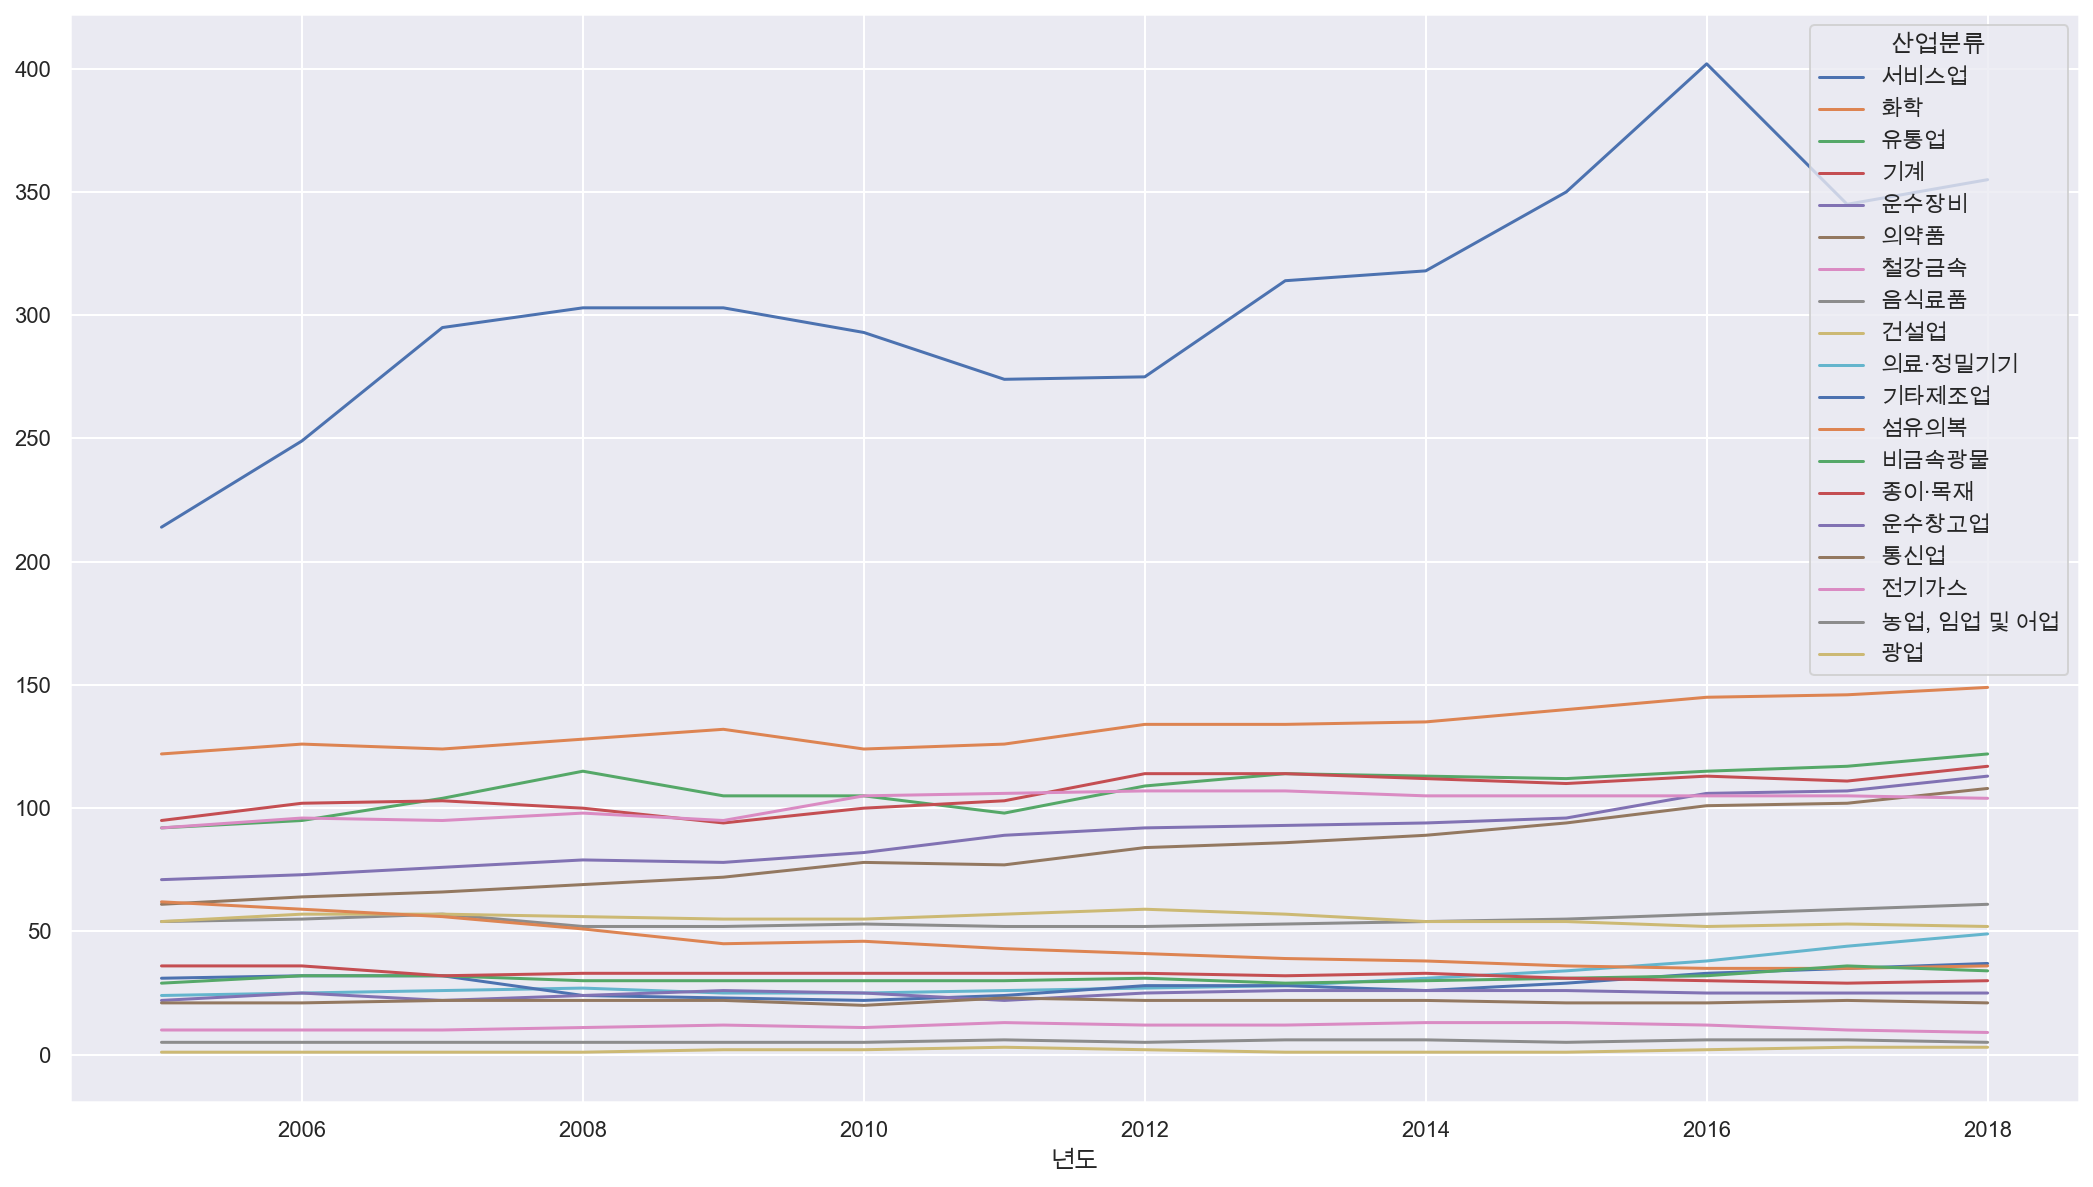

In [13]:
df_mkcap[sector_ls].plot()

### 정규화 한 그래프

<AxesSubplot:xlabel='년도'>

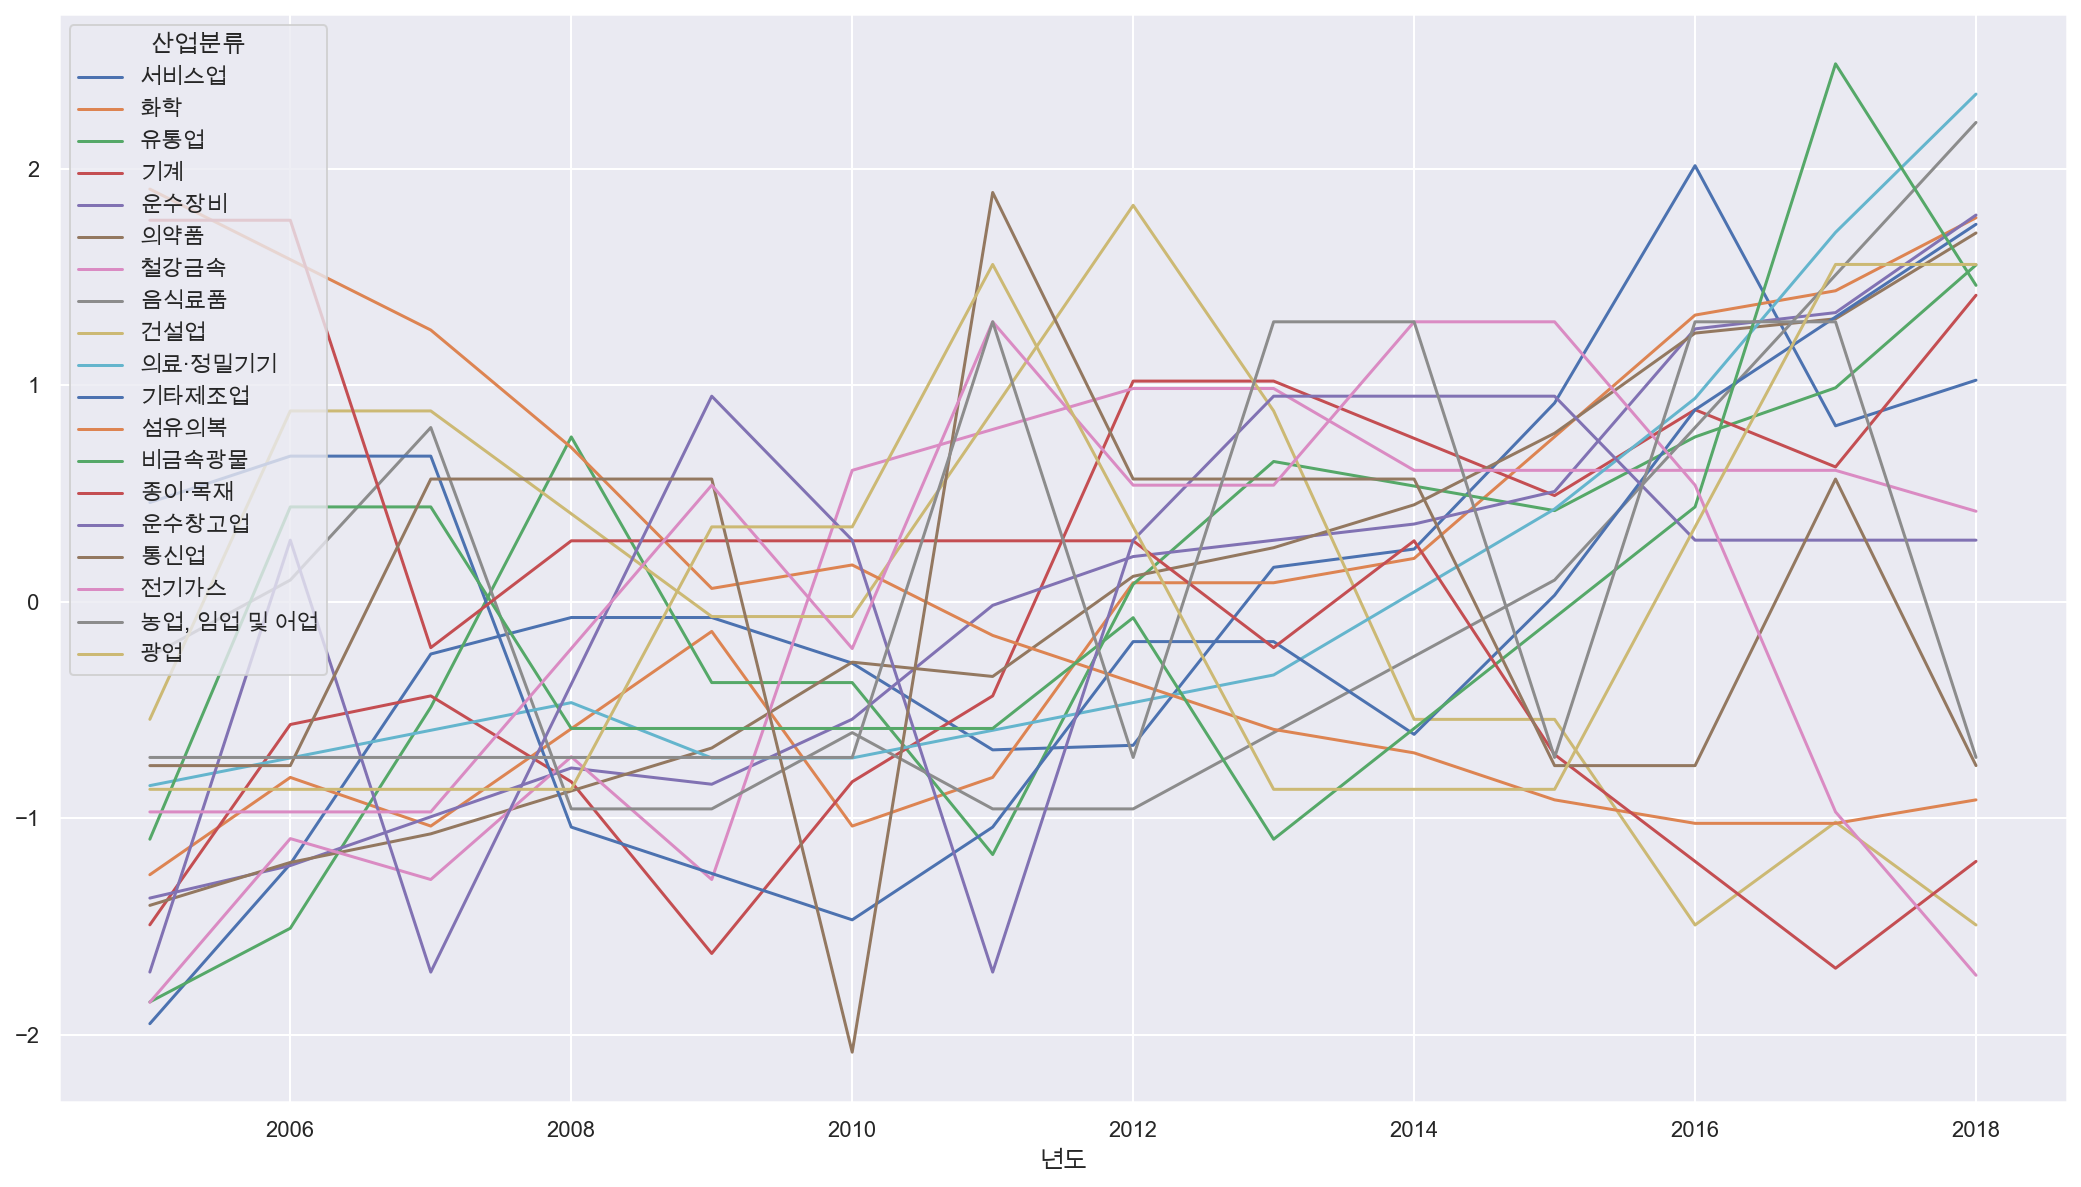

In [14]:
df_mkcap_norm[sector_ls].plot()

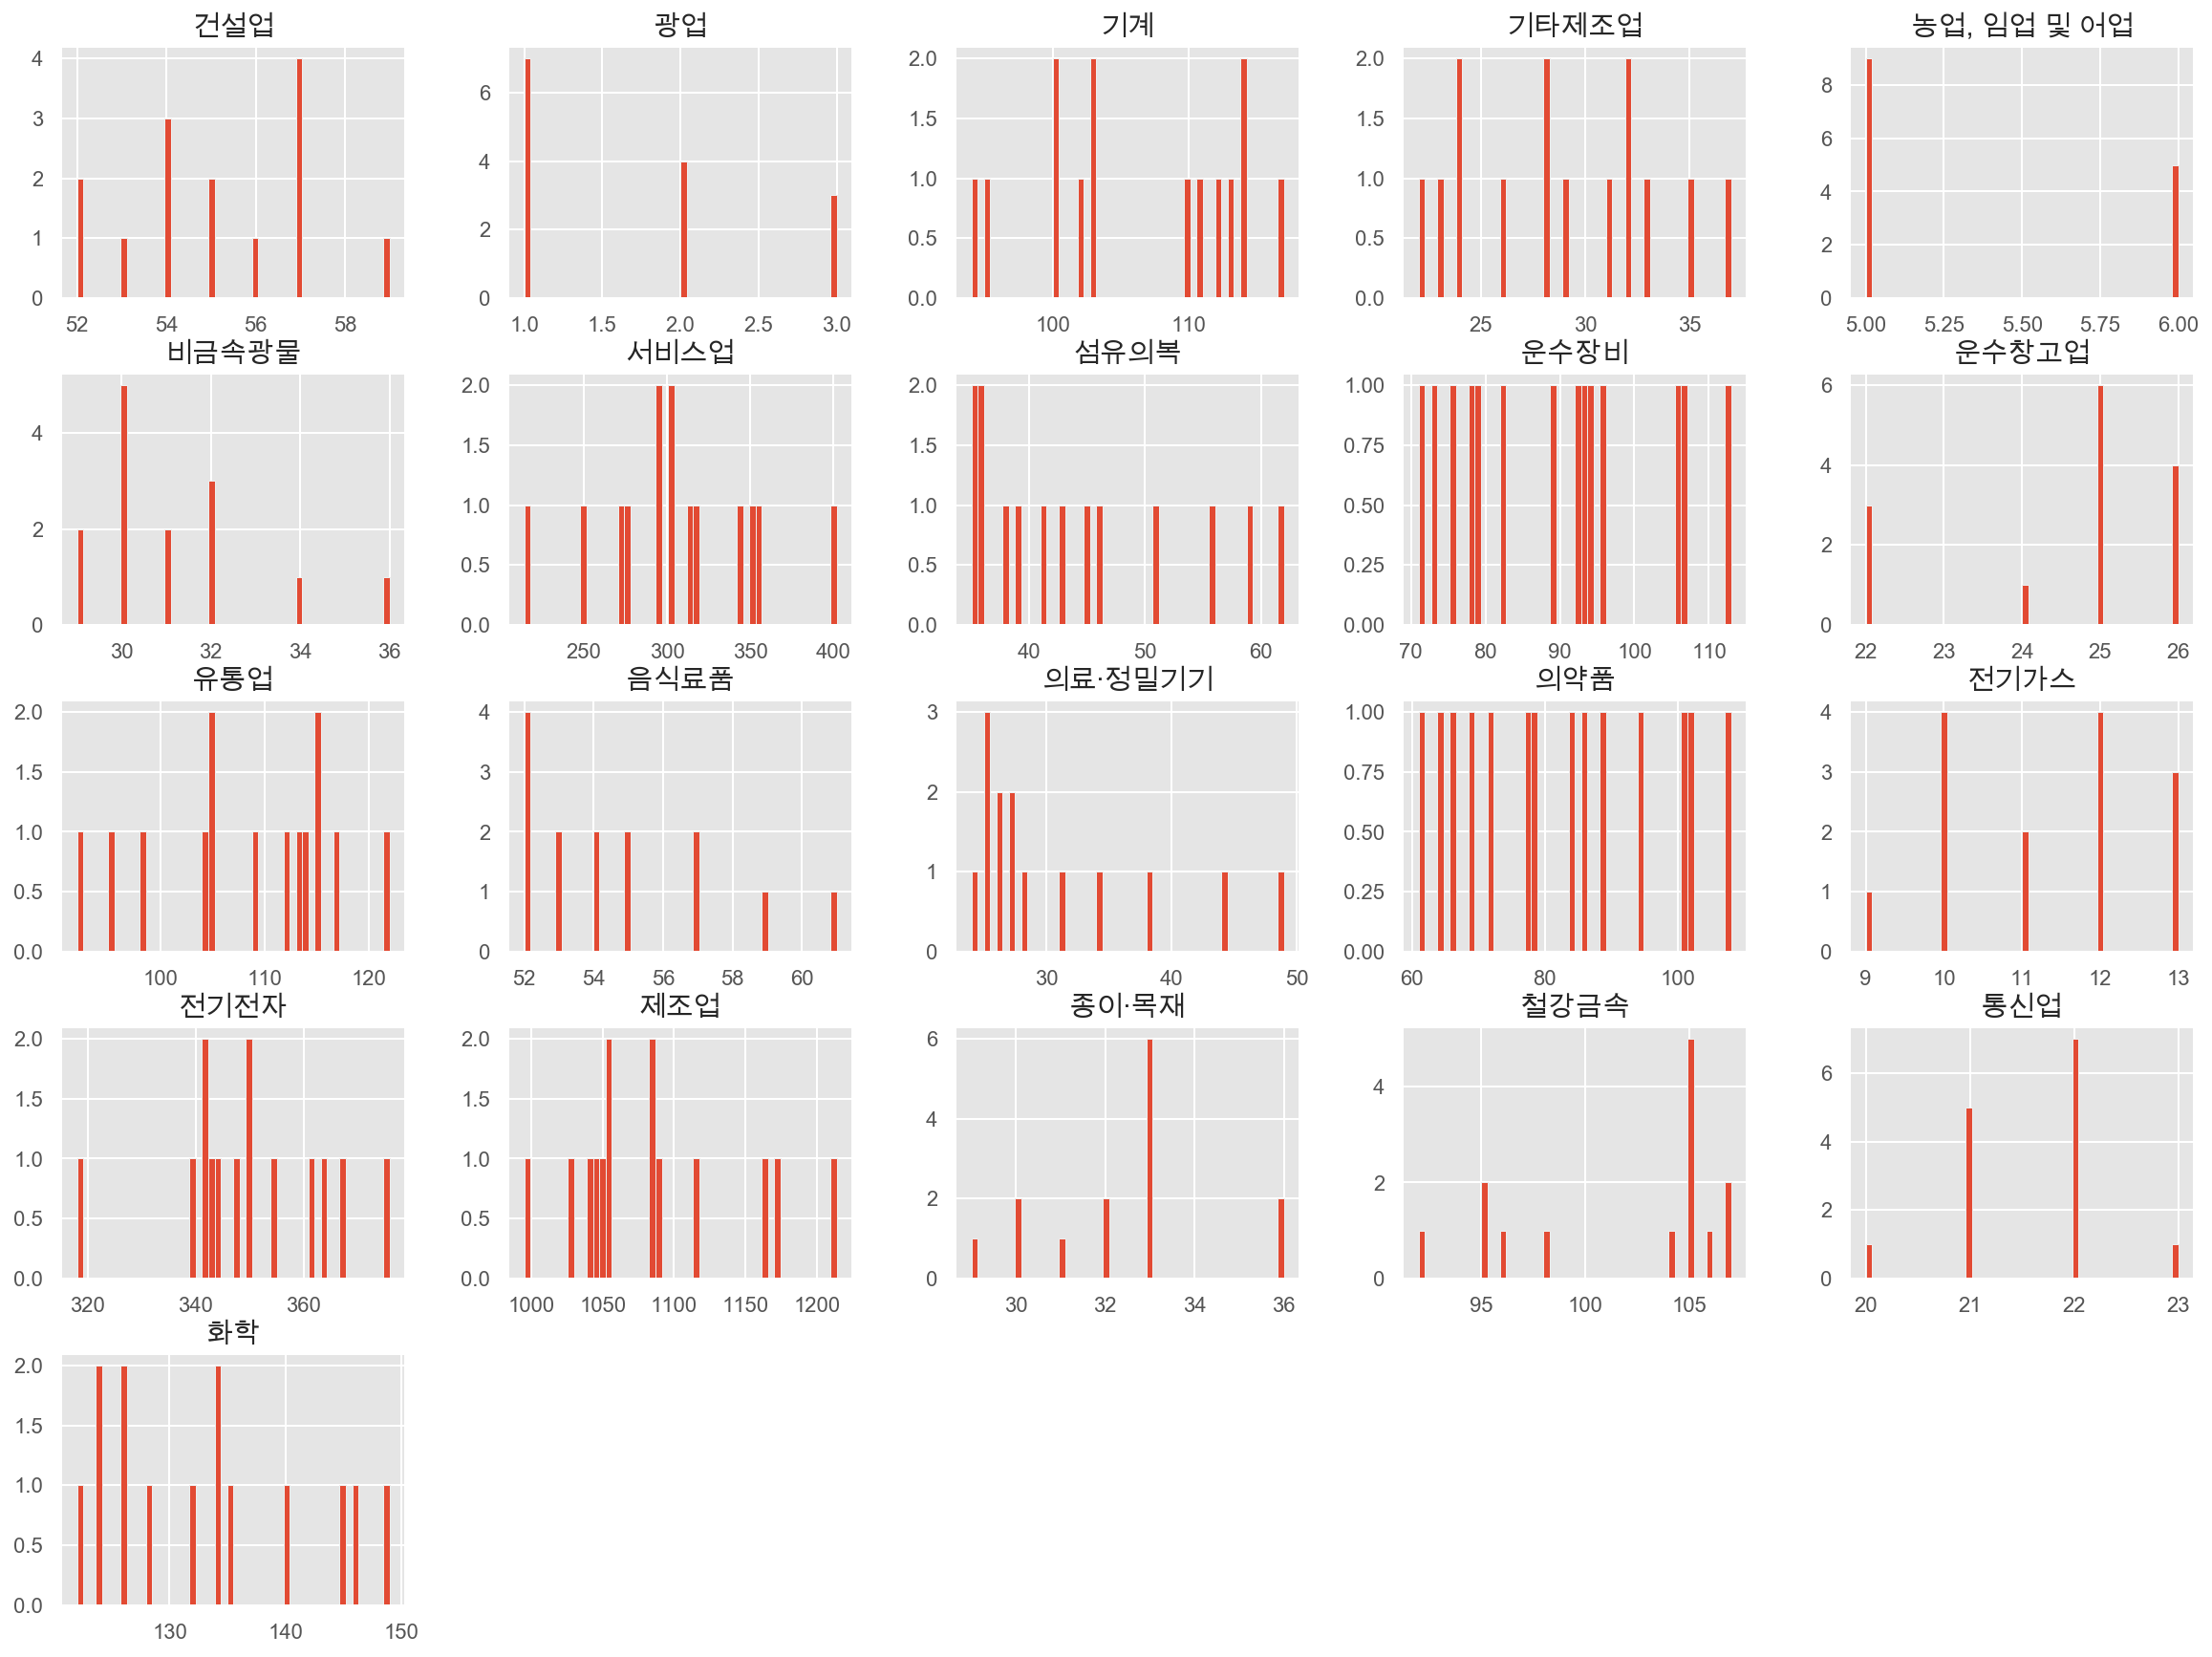

In [15]:
plt.style.use(['ggplot'])

df_mkcap.hist(bins=50, figsize=(20,15))
plt.show()

## 주식시장에도 
- 유망한 산업의 주식을 사는 것이 평균적으로 수익이 좋을까?

In [16]:
df = pd.read_csv('./datas/industry_merged.csv')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.67,4.96,36.71,6.78,13.24,7.92,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.41,5.85,46.30,7.95,14.79,8.86,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.07,4.87,38.70,6.54,11.28,6.45,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.48,4.12,37.41,6.09,9.69,5.47,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.77,2.27,24.91,3.40,5.77,3.15,188031835,31828104


In [17]:
### 좀 꺼져라 제조업!!
df.drop(index=df[df['산업분류'] == '제조업'].index, inplace=True)

In [18]:
df_sum = df.groupby('년도').sum()
df_sum

,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
년도,,,,,,,,,,,,,
2005,1414,638511725,48968843,59228665,64366409,209.37,71.79,688.78,108.61,123.74,95.36,2236638232,725710898
2006,1505,674250620,42714671,49245004,53748011,140.80,-51.73,389.09,-19.11,8.36,30.21,2387255226,776405115
2007,1565,713798069,39060260,45709601,51506979,52.40,-10.22,447.07,24.33,33.16,45.88,2592448652,1051772183
2008,1589,764064066,40718235,50826503,53886431,251.59,-11.64,275.10,16.10,-5.85,24.57,2984464083,623111880
2009,1559,950399789,29201183,55942884,36633209,210.07,-80.09,403.03,-152.10,55.53,50.97,2967441312,974008029
2010,1562,971975725,46059074,58401281,58232842,125.43,31.01,736.47,58.85,77.85,68.94,3371067697,1239847615
2011,1548,1124384312,72333864,80482156,87804684,281.30,51.20,1105.05,83.26,96.72,84.59,3745393872,1147992743
2012,1592,1233961617,51907141,68659921,65283086,151.91,-22.24,676.20,2.45,37.37,37.62,3835050068,1263416113
2013,1637,1296309909,51582707,67209713,63041716,74.65,35.54,643.36,55.74,42.14,45.77,3828654099,1305514885


/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='회사수 (개)', ylabel='Density'>

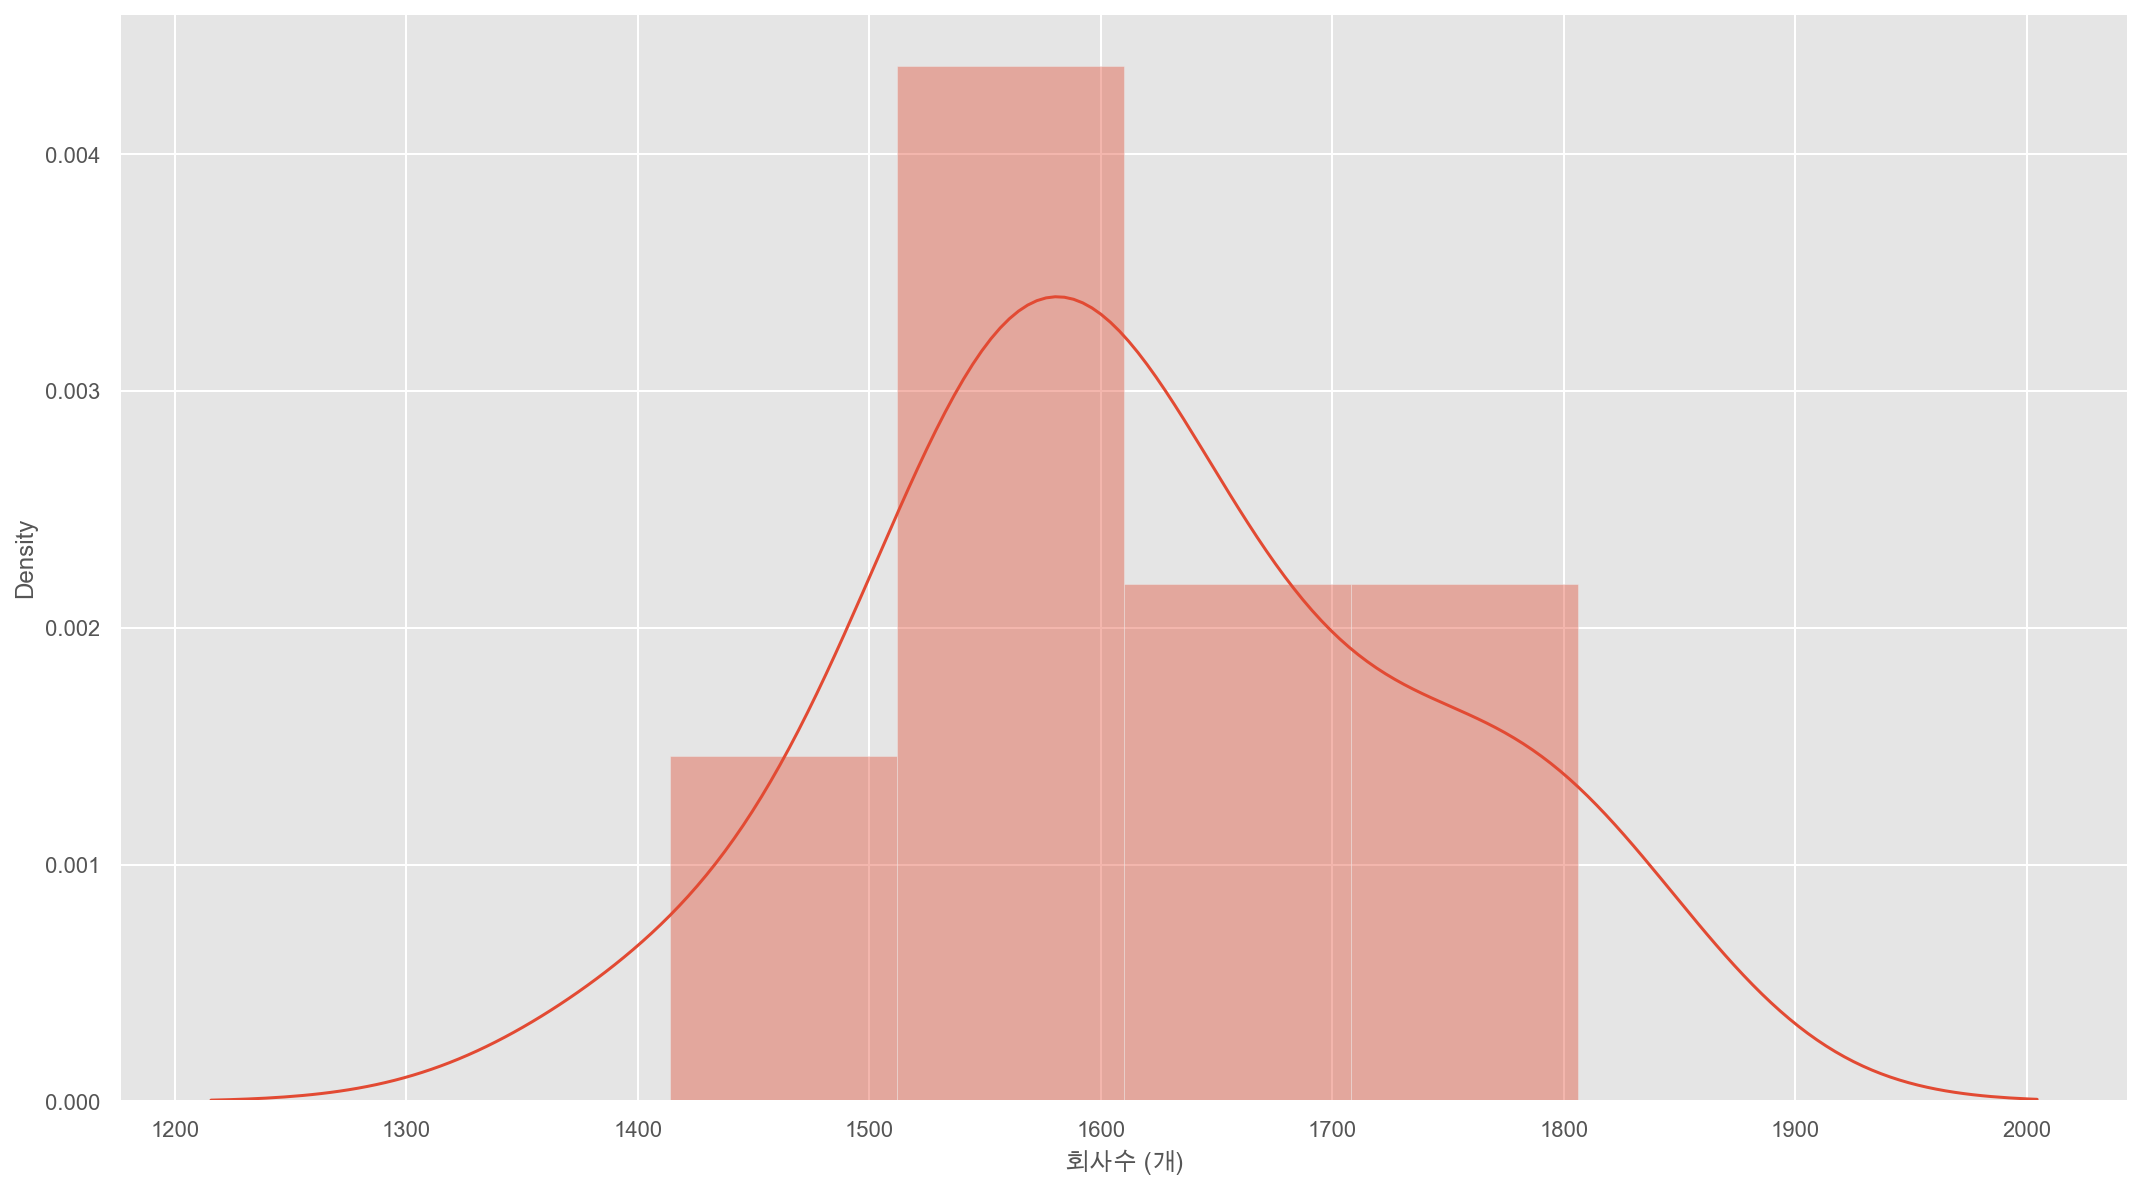

In [19]:
sns.distplot(df_sum['회사수 (개)'])

In [20]:
df_total = df[['산업분류','시총','년도']]
df_total

,산업분류,시총,년도
0,건설업,26444487,2005
1,건설업,33138291,2006
2,건설업,53907176,2007
3,건설업,22653768,2008
4,건설업,31828104,2009
...,...,...,...
275,화학,101787219,2014
276,화학,151122008,2015
277,화학,145991288,2016
278,화학,174977373,2017


# 전체 산업 별 시총 점유는 어떻게 바뀌었을까

In [21]:
df_total_p = df.pivot_table('시총','년도','산업분류')
df_total_p

산업분류,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,유통업,음식료품,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학
년도,,,,,,,,,,,,,,,,,,,,
2005,26444487,48973,16923463,9554598,243346,4837800,176544475,3984390,66677380,11996447,33821283,18836498,2614573,11603193,28662374,193683017,3000138,29259401,38210022,48765040
2006,33138291,37428,17029892,10642605,269164,4800609,190511958,5422769,59387076,14213950,53526399,20837285,3655612,11742149,32303262,170062155,2990582,42267790,45865613,57700526
2007,53907176,224023,30972491,13876827,735154,6880762,261729967,5882752,101017750,32320792,67003519,24512793,5060623,15413941,33143568,178873248,3314555,78179994,49005964,89716284
2008,22653768,130904,15393929,12197236,702432,3398003,139697721,2795221,48289026,19211011,36069281,16468414,3055472,11882778,25406454,116721643,1986393,49676813,41334727,56040654
2009,31828104,150160,21914487,10643738,938050,4460303,236517782,4449014,85486557,19773405,51174452,18504921,7547511,16368157,27537972,228509681,2506789,82413112,32704178,90579656
2010,34691829,290631,28268495,10923523,1128198,5330501,309610767,5101455,158774075,27347187,66608735,19879145,1992368,19257970,26053789,267195948,2731121,77933588,35061912,141666378
2011,28094386,773194,26125956,13940451,1366514,4793119,275756661,5869136,161485994,21415813,65562217,23121927,2271946,20823603,22224681,256524351,2372384,65858215,29282366,120329829
2012,26801615,379326,22201462,13259333,1999633,4765877,295876767,4833118,158587170,22766836,66478340,28534117,2867240,24491062,28183186,342657896,2564677,64026217,31175823,120966418
2013,26030658,268436,21801467,12780969,1999841,5008672,327537357,5362746,175023340,19182622,71631893,29178108,3887847,25772166,32186459,329574843,2997391,60212919,39690315,115386836


In [22]:
order_ls = df_total_p.loc[2017].sort_values().index.to_list()
order_ls

['광업',
 '농업, 임업 및 어업',
 '종이·목재',
 '섬유의복',
 '의료·정밀기기',
 '비금속광물',
 '운수창고업',
 '기타제조업',
 '건설업',
 '전기가스',
 '기계',
 '음식료품',
 '통신업',
 '철강금속',
 '유통업',
 '의약품',
 '운수장비',
 '화학',
 '서비스업',
 '전기전자']

In [23]:
df_total_p = df_total_p.drop(columns='제조업')

KeyError: "['제조업'] not found in axis"

In [24]:
df_total_p.columns

Index(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학'],
      dtype='object', name='산업분류')

In [25]:
total_stacked = df_total_p.apply(lambda x: x*100/sum(x), axis=1)
total_stacked
# stacked_data.plot(kind="bar", stacked=True)

산업분류,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,유통업,음식료품,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학
년도,,,,,,,,,,,,,,,,,,,,
2005,3.64,0.01,2.33,1.32,0.03,0.67,24.33,0.55,9.19,1.65,4.66,2.60,0.36,1.60,3.95,26.69,0.41,4.03,5.27,6.72
2006,4.27,0.00,2.19,1.37,0.03,0.62,24.54,0.70,7.65,1.83,6.89,2.68,0.47,1.51,4.16,21.90,0.39,5.44,5.91,7.43
2007,5.13,0.02,2.94,1.32,0.07,0.65,24.88,0.56,9.60,3.07,6.37,2.33,0.48,1.47,3.15,17.01,0.32,7.43,4.66,8.53
2008,3.64,0.02,2.47,1.96,0.11,0.55,22.42,0.45,7.75,3.08,5.79,2.64,0.49,1.91,4.08,18.73,0.32,7.97,6.63,8.99
2009,3.27,0.02,2.25,1.09,0.10,0.46,24.28,0.46,8.78,2.03,5.25,1.90,0.77,1.68,2.83,23.46,0.26,8.46,3.36,9.30
2010,2.80,0.02,2.28,0.88,0.09,0.43,24.97,0.41,12.81,2.21,5.37,1.60,0.16,1.55,2.10,21.55,0.22,6.29,2.83,11.43
2011,2.45,0.07,2.28,1.21,0.12,0.42,24.02,0.51,14.07,1.87,5.71,2.01,0.20,1.81,1.94,22.35,0.21,5.74,2.55,10.48
2012,2.12,0.03,1.76,1.05,0.16,0.38,23.42,0.38,12.55,1.80,5.26,2.26,0.23,1.94,2.23,27.12,0.20,5.07,2.47,9.57
2013,1.99,0.02,1.67,0.98,0.15,0.38,25.09,0.41,13.41,1.47,5.49,2.23,0.30,1.97,2.47,25.24,0.23,4.61,3.04,8.84


Text(0, 0.5, '시총')

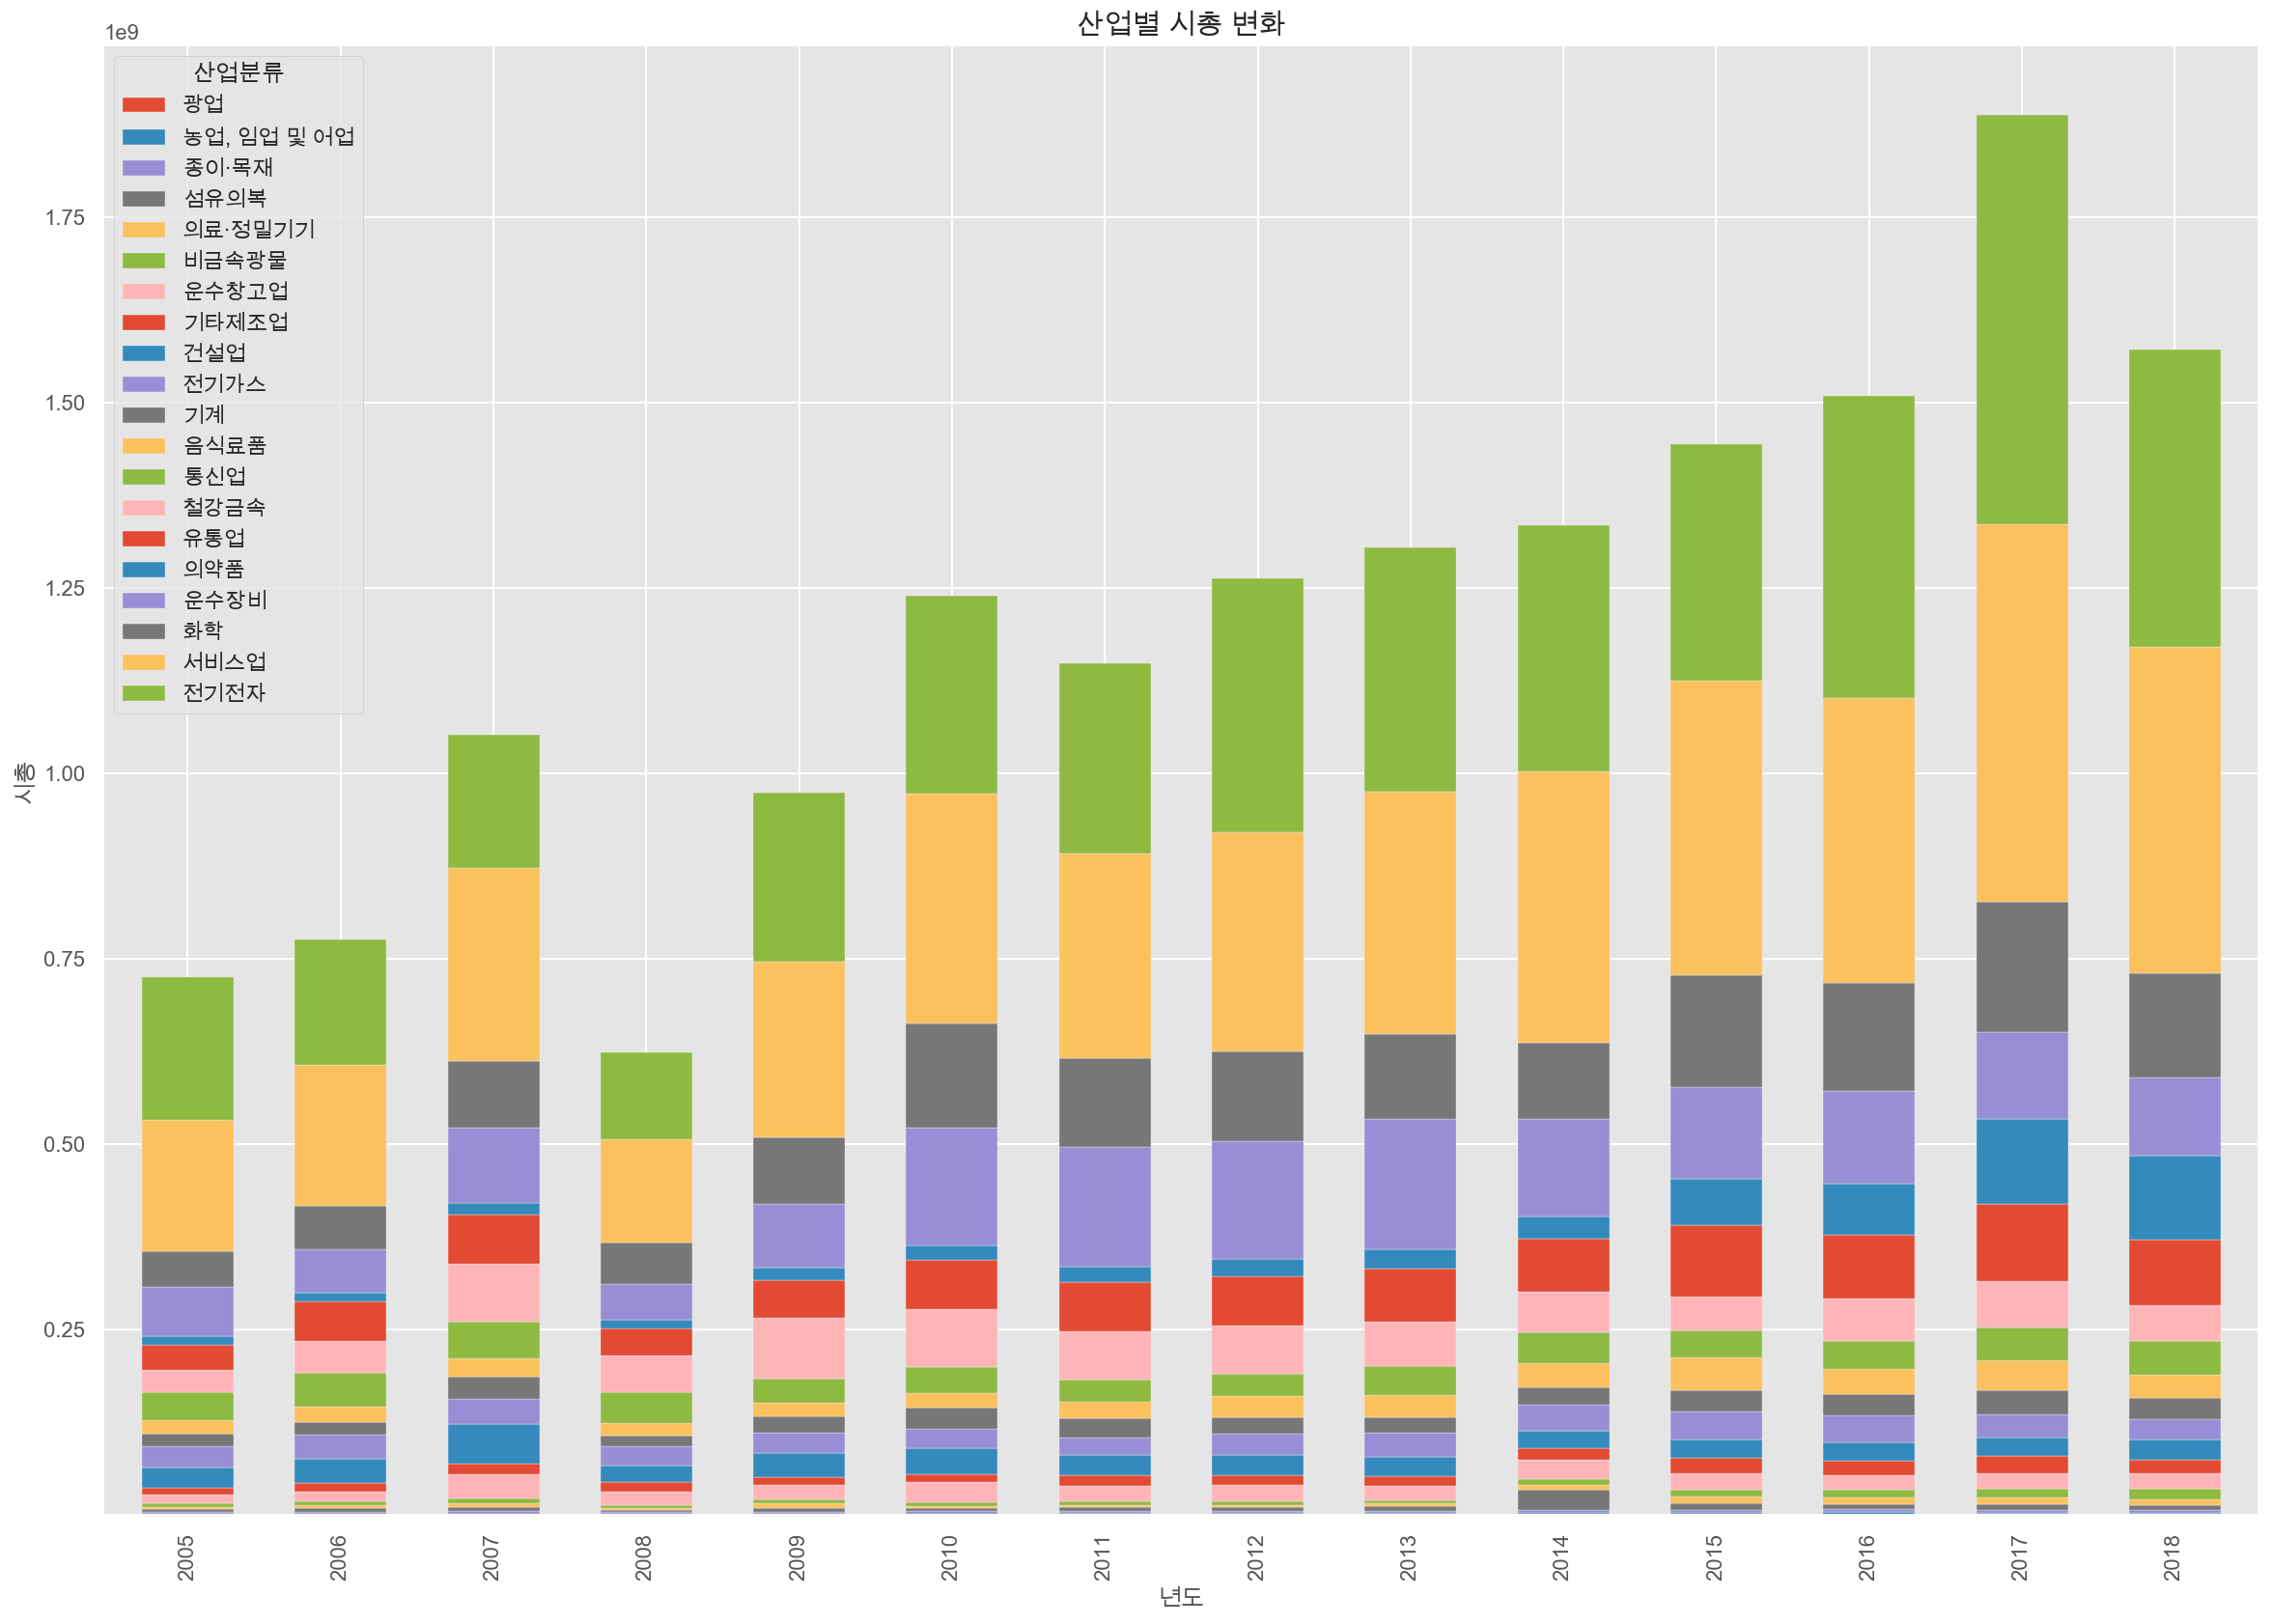

In [26]:
ax = df_total_p[order_ls].plot(kind='bar', stacked=True, figsize=(20,14), linewidth=0.2, width=0.6)
plt.title('산업별 시총 변화')
plt.xlabel("년도")
plt.ylabel("시총")

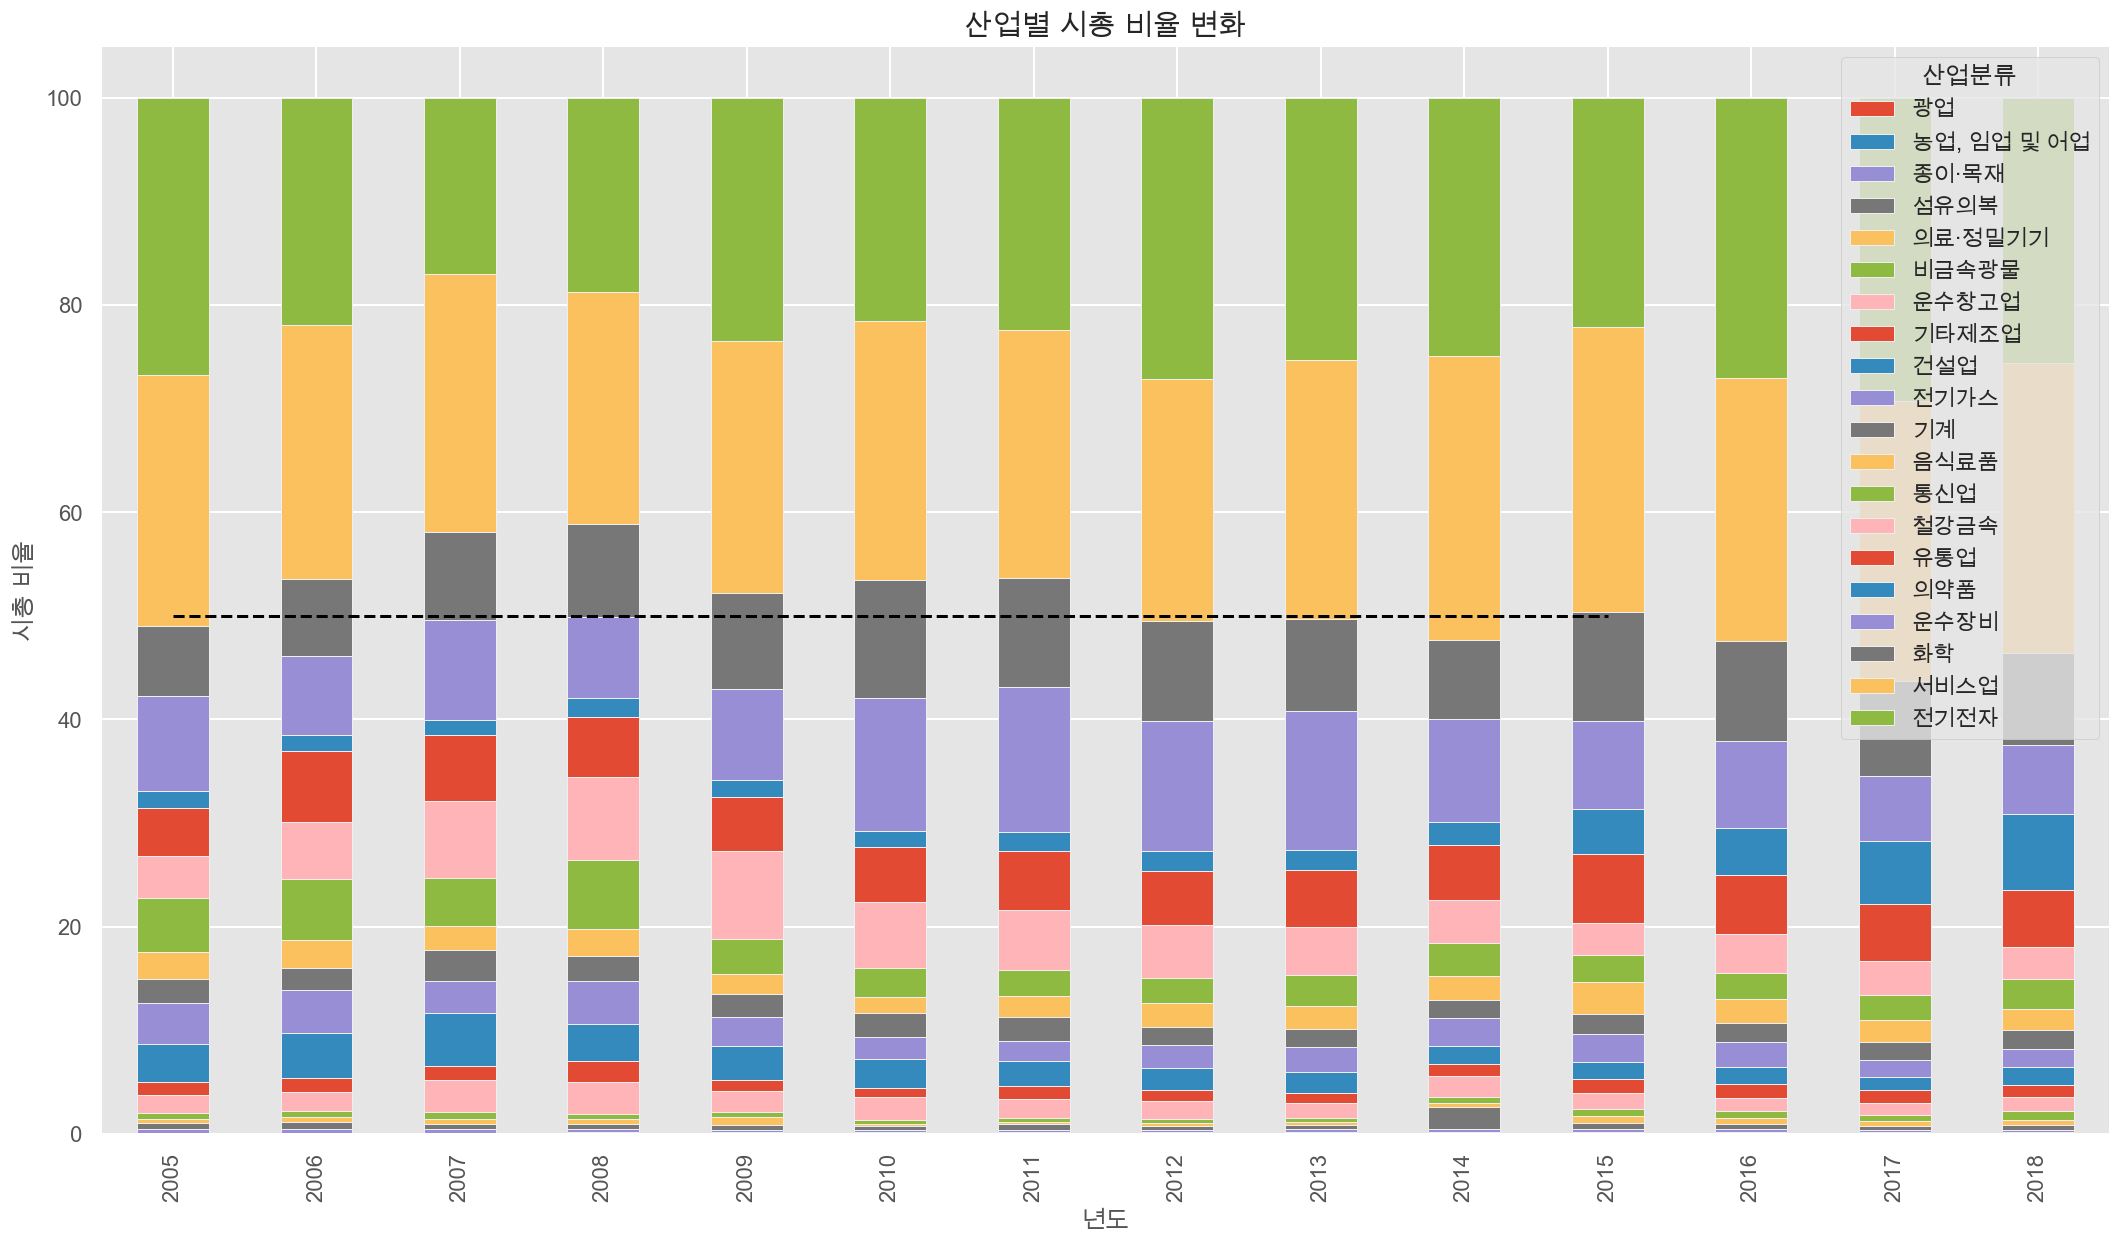

In [27]:
total_stacked[order_ls].plot(kind='bar', stacked=True)
plt.title('산업별 시총 비율 변화')
plt.xlabel("년도")
plt.ylabel("시총 비율")

plt.hlines(y=50, xmin=0, xmax=10, linestyles='dashed', colors='black', label='50%')
plt.show()

# 회사 당 평균 시총은?

In [ ]:
df.tail()

In [ ]:
df['회사당 시총'] = df['시총'] / df['회사수 (개)']
df.head()

In [ ]:
df.head()

In [ ]:
df_comp_per_rev = df.pivot_table('회사당 시총', '년도','산업분류')
df_comp_per_rev.head()

In [ ]:
order_ls_per = df_comp_per_rev.loc[2018].sort_values().index.to_list()
order_ls_per

In [ ]:
order_ls_per = df_comp_per_rev.loc[2018].sort_values(ascending=False).index.to_list()
order_ls_per

In [ ]:
plt.rcParams['axes.titlepad'] = 32
plt.rcParams['axes.titlesize'] = 24
# fontsize=24, 

In [ ]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='white')
sns.set_context("notebook")

In [ ]:
df_comp_per_rev.head()

In [ ]:
ax = df_comp_per_rev[order_ls_per].plot(kind='bar', stacked=True)
plt.title('산업별 평균 시총')
plt.xlabel("년도")
plt.ylabel("시총")

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left')

In [ ]:
total_stacked_per = df_comp_per_rev.apply(lambda x: x*100/sum(x), axis=1)
total_stacked_per

In [ ]:
ax = df_comp_per_rev[order_ls_per].plot(kind='bar',stacked=True, figsize=(16, 12))
plt.title('업종별 평균 시총 비')
plt.xlabel("년도", fontsize=16)
plt.ylabel("시총 비율", fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.01, 1.01), loc='upper left')

# 회사당 시장규모

In [ ]:
df['회사당 시장규모'] = df['시장규모'] / df['회사수 (개)']
df.tail()

In [ ]:
df_comp_per_mks = df.pivot_table('회사당 시장규모', '년도','산업분류')
df_comp_per_mks.head()

In [ ]:
order_ls_mks = df_comp_per_mks.loc[2018].sort_values().index.to_list()
order_ls_mks

In [ ]:
# df_comp_per_mks.drop(columns='광업', inplace=True)
# order_ls_mks.remove('광업')

In [ ]:
order_ls_mks

In [ ]:
ax = df_comp_per_mks[order_ls_mks].plot(kind='bar', stacked=True)
# plt.margins(y=1000)
plt.title('산업별 회사당 시장규모 변화', fontsize=24, pad=32)
plt.xlabel("년도", fontsize=18, labelpad=14)
plt.ylabel("시장규모", fontsize=18)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.01, 1.02), loc='upper left')

In [ ]:
leg = ax.get_legend()
leg

In [ ]:
leg.

In [ ]:
total_stacked_mks = df_comp_per_mks.apply(lambda x: x*100/sum(x), axis=1)
total_stacked_mks

In [ ]:
ax = total_stacked_mks[order_ls_mks].plot(kind='bar',stacked=True)
# ax.barh()
# ax.barh(y_pos, performance, xerr=error, align='center')
# ax.barh(y=total_stacked_mks[order_ls_mks].index, width=total_stacked_mks[order_ls_mks].columns)

plt.title('회사당 시장규모 변화')
plt.xlabel("년도")
plt.ylabel("시장규모")

# ax.invert_yaxis()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left')

# 회사당 매출액

In [ ]:
df.columns

In [ ]:
df['회사당 시총'] = df['매출액 (백만원)'] / df['회사수 (개)']
df.tail()

In [ ]:
df.tail()

In [ ]:
df[df['산업분류'] == '전기가스']

In [ ]:
df_comp_per_reve = df.pivot_table('회사당 시총', '년도','산업분류')
df_comp_per_reve.tail()

In [ ]:
order_ls_reve = df_comp_per_reve.loc[2018].sort_values().index.to_list()
order_ls_reve

In [ ]:
ax = df_comp_per_reve[order_ls_reve].plot(kind='bar', stacked=True)
# plt.margins(y=1000)
plt.title('산업별 회사당 매출액 변화', fontsize=24, pad=32)
plt.xlabel("년도", fontsize=18, labelpad=14)
plt.ylabel("시장규모", fontsize=18)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.01, 1.02), loc='upper left')

In [ ]:
ax = total_stacked_per[order_ls_per].plot(kind='bar',stacked=True, figsize=(16, 12))
plt.title('회사 평균 매출')
plt.xlabel("년도", fontsize=16)
plt.ylabel("비율", fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.01, 1.01), loc='upper left')

In [ ]:
sns.catplot(
    data=df_sum, kind="bar",
    x=df_sum.index, y="회사수 (개)", 
    ci="sd", palette="dark", alpha=.6, height=6
)

In [ ]:
sns.catplot(
    data=df_sum, kind="bar",
    x=df_sum.index, y="매출액 (백만원)", 
    ci="sd", palette="dark", alpha=.6, height=6
)

In [ ]:
sns.catplot(
    data=df_sum, kind="bar",
    x=df_sum.index, y="시총", 
    ci="sd", palette="dark", alpha=.6, height=6
)

# 2019년 까지

In [ ]:
df_to2019 = pd.read_csv('./datas/industry_merged_mimc_nomanuf.csv')
df_to2019.head()

In [ ]:
df_total_p19 = df_to2019.pivot_table('시총','년도','산업분류')
df_total_p19.head()

In [ ]:
df_total_p20 = df_total_p19.append(df_2020)
df_total_p20

In [ ]:
order_ls19 = df_total_p19.loc[2019].sort_values().index.to_list()
order_ls19

In [ ]:
ax = df_total_p19[order_ls19].plot(kind='bar', stacked=True, figsize=(20,14), linewidth=0.2, width=0.6)
plt.title('산업별 시총 변화')
plt.xlabel("년도", fontsize=16)
plt.ylabel("시총", fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.01, 1.01), loc='upper left')

In [ ]:
total_stacked19 = df_total_p19.apply(lambda x: x*100/sum(x), axis=1)
total_stacked19

In [ ]:
ax = total_stacked19[order_ls19].plot(kind='bar',stacked=True, figsize=(16,12))
plt.title('산업별 평균 시가총액 비율')
plt.xlabel("년도", fontsize=16)
plt.ylabel("시가총액 퍼센트", fontsize=16)

plt.hlines(y=50, xmin=-1, xmax=20, linestyles='dashed', colors='black', label='50%')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.01, 1.01), loc='upper left')

In [ ]:
df_2020 = pd.read_csv('./datas/market_cap_2020.csv', encoding='euc-kr')
df_2020.head()

In [ ]:
df_2020.drop(columns=df_2020.columns[1], inplace=True)

In [ ]:
df_2020 = df_2020.T
df_2020

In [ ]:
df_2020.columns = df_2020.iloc[0]
df_2020

In [ ]:
df_2020.drop(index='산업별(1)', inplace=True)

In [ ]:
df_2020.rename(columns={'농림업':'농업, 임업 및 어업', '음식료·담배':'음식료품',
                                               '섬유·의류':'섬유의복', '제약':'의약품', '비금속':'비금속광물', '금속':'철강금속',
                                               '기계.장비':'기계', '일반전기전자':'전기전자', '운송장비·부품':'운수장비',
                                               '전기.가스.수도':'전기가스', '건설':'건설업', '유통':'유통업', '운송':'운수창고업',
                                               '기타서비스':'서비스업', '통신방송서비스':'통신업'}, inplace=True)

In [ ]:
df_2020 = df_2020.apply(pd.to_numeric)

df_2020.info()

In [ ]:
df_tmp = df_2020.T.reset_index()
df_tmp

In [ ]:
df_2020.columns

In [ ]:
df_tmp.loc[df_tmp['산업별(1)'] == 'IT H/W','산업별(1)'] = '전기전자'
df_tmp.loc[df_tmp['산업별(1)'] == '출판·매체복제','산업별(1)'] = '기타제조업'
df_tmp.loc[df_tmp['산업별(1)'] == '금융','산업별(1)'] = '서비스업'
df_tmp.loc[df_tmp['산업별(1)'] == '오락·문화','산업별(1)'] = '서비스업'
df_tmp.loc[df_tmp['산업별(1)'] == '숙박·음식','산업별(1)'] = '서비스업'
df_tmp.loc[df_tmp['산업별(1)'] == 'IT S/W & SVC','산업별(1)'] = '서비스업'

In [ ]:
df_tmp

In [ ]:
df_2020['전기전자'] 
df_2020['IT H/W'] = df_2020['전기전자']
df_2020['기타제조업'] = df_2020['기타제조업'] + df_2020['출판·매체복제']
df_2020['서비스업'] = df_2020['서비스업'] + df_2020['금융'] + df_2020['오락·문화'] + df_2020['숙박·음식'] + df_2020['IT S/W & SVC'] 



In [ ]:
df_tmp = df_tmp.groupby('산업별(1)').sum()
len(df_tmp)

In [ ]:
df_2020[df_2020.index.duplicated()]

## 코스닥

In [ ]:
# df_tmp.reset_index(inplace=True)
df_tmp.drop(index=16, inplace=True)
df_tmp

# 코스피

In [ ]:
kospi_raw_data = pd.read_csv('./datas/market_cap_kospi.csv', encoding='euc-kr')
kospi_raw_data.head()

In [ ]:
kospi_raw_data = kospi_raw_data.T

In [ ]:
kospi_raw_data = kospi_raw_data.rename(columns=kospi_raw_data.iloc[0])

In [ ]:
kospi_raw_data = kospi_raw_data.drop(index=['산업별(1)','산업별(2)'])
kospi_raw_data

In [ ]:
kospi_raw_data = kospi_raw_data.reset_index()
kospi_raw_data

In [ ]:
kospi_raw_data = kospi_raw_data.apply(pd.to_numeric)
kospi_raw_data.info()

In [ ]:
kospi_raw_data.rename(columns={'의료정밀':'의료·정밀기기', '농업 임업 및 어업':'농업, 임업 및 어업'}, inplace=True)

In [ ]:
kospi_raw_data = kospi_raw_data.T
kospi_raw_data = kospi_raw_data.reset_index()
kospi_raw_data

In [ ]:
kospi_raw_data = kospi_raw_data.groupby('index').sum()

In [ ]:
kospi_raw_data = kospi_raw_data.T
kospi_raw_data

In [ ]:
kospi_raw_data = kospi_raw_data.drop(columns='금융업')

In [ ]:
kospi_raw_data['서비스업'] = kospi_raw_data['서비스업'] + kospi_raw_data['금융업']

In [ ]:
kospi_raw_data = kospi_raw_data.set_index('index')
kospi_raw_data

In [ ]:
order_ls

In [ ]:
df_tmp = df_tmp.T

In [ ]:
df_tmp.columns = df_tmp.iloc[0,:]
df_tmp

In [ ]:
df_tmp = df_tmp.drop(index='산업별(1)')

In [ ]:
df_tmp = df_tmp.astype(float)
df_tmp.info()

In [ ]:
kospi_raw_data = kospi_raw_data.astype(float)
kospi_raw_data.info()

In [ ]:
kospi_raw_data.reset_index(inplace=True)
df_tmp.reset_index(inplace=True)

In [ ]:
df_2020 = df_tmp.append(kospi_raw_data).groupby(level=0).sum()
df_2020

In [ ]:
as_list = df_2020.index.tolist()
as_list[0] = '2020'
df_2020.index = as_list
# idx = as_list.index('Republic of Korea')
# as_list[idx] = 'South Korea'
# df.index = as_list

In [ ]:
df_2020

In [ ]:
df_2019

In [ ]:
df_to2019

In [ ]:
df_to2019['산업분류'].unique()

In [ ]:
df_to2019['산업분류'] == 

# 어떤 업종이 돈을 잘벌까
납입자본 이익율 : 흔히 회사의 '자본' 대비 연간 수익을 말함

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df[['산업분류','년도','납입자본이익률 (%)']].head()

In [ ]:
df = pd.read_csv('./datas/norm_std.csv', encoding='utf-8')
df

In [ ]:
df_tmp = df.iloc[:14,:]
df_tmp = df_tmp.set_index(['산업분류','년도'])
df_tmp

In [ ]:
ㅇㄹ_

In [ ]:
df_tmp = df_tmp.corr()
plt.figure(figsize=(18,14))
sns.heatmap(df_tmp, annot=True, fmt="f")
plt.show()